## ULTRASONIC WAVE PROPAGATION IMAGING

### Import libraries

In [1]:
import os
import glob
import pandas as pd
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Setup global variables

In [2]:
HEIGHT = 40
WIDTH = 40
STARTING_POINT = 20
SAMPLING_LENGTH = 800
SIMULATION_TIME = 400
RMS_WEIGHT = 2
PATH_DATA = "E:/1. LASER-ULTRASONIC DATA/0. Official 11 bolt (May 2020)/1. Data/Official data (26.5)/BOLT10/25/RD"

### Load signals function

In [3]:
def stack_signals_into_3D(path_data, height, width, starting_point, sampling_length):
    frame = np.zeros((height, width, sampling_length))
    for y in tqdm(range(1, height + 1)):
        for x in range(1, width +1):
            signal_num = x + width*(y-1)
            signal_data = pd.read_csv(path_data + str(signal_num), header=None)
            signal_mean = signal_data - np.mean(signal_data)

            if y%2 != 0:
                frame[x-1, height+1-y-1, :] = signal_mean.values[:,0][starting_point :sampling_length+STARTING_POINT]
            elif y%2 ==0:
                frame[width+1-x-1, height+1-y-1, :] = signal_mean.values[:,0][starting_point:sampling_length+STARTING_POINT]
    frame = frame[::-1]
    return frame

In [4]:
frame = stack_signals_into_3D(path_data = PATH_DATA, height = HEIGHT, width = WIDTH, starting_point=STARTING_POINT, sampling_length=SAMPLING_LENGTH)

100%|██████████| 40/40 [00:03<00:00, 10.88it/s]


### Visualize frame

In [5]:
def visualize_25_snapshot(frame, start_point):
    plt.figure(figsize = (20,20))
    vis_show = 1
    for vis_num in tqdm(range(start_point, start_point +25 )):
        plt.subplot(5,5,vis_show)
        vis_show+=1
        plt.imshow(frame[:,:, vis_num], cmap = 'coolwarm')
        plt.title("UWPI at {} sampling point".format(vis_num))
    plt.show()

100%|██████████| 25/25 [00:00<00:00, 65.44it/s]


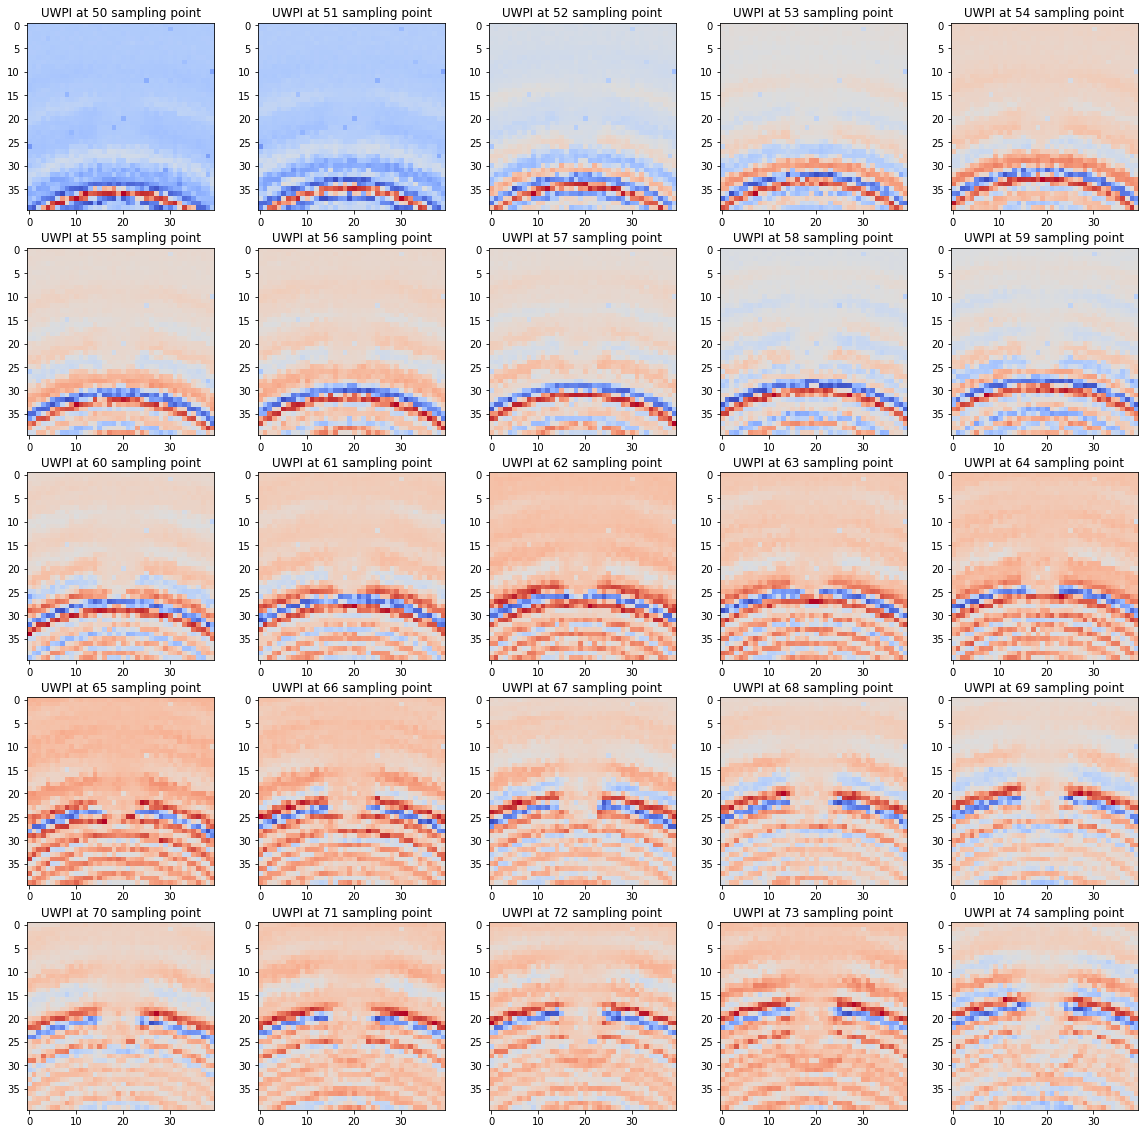

In [6]:
visualize_25_snapshot(frame, start_point = 50)

### Signal processing 

In [7]:
def rms_processing(frame, weight = True, log = True):
    temp_rms_s = np.zeros((HEIGHT, WIDTH))
    frame_rms = np.zeros((HEIGHT, WIDTH, SIMULATION_TIME*2))
    for f in tqdm(range(SIMULATION_TIME)):
        if weight:
            temp_rms_s = temp_rms_s + (frame[:,:,f]**2)*(f**RMS_WEIGHT)
        else:
            temp_rms_s = temp_rms_s + (frame[:,:,f]**2)
        rms_s = np.sqrt(temp_rms_s/f)
        frame_rms[:,:,f]= rms_s
    if log:
        return np.log(frame_rms)
    else:
        return frame_rms

In [8]:
frame_rms = rms_processing(frame, weight = False, log = True)

100%|██████████| 400/400 [00:00<00:00, 21021.45it/s]


100%|██████████| 25/25 [00:00<00:00, 64.26it/s]


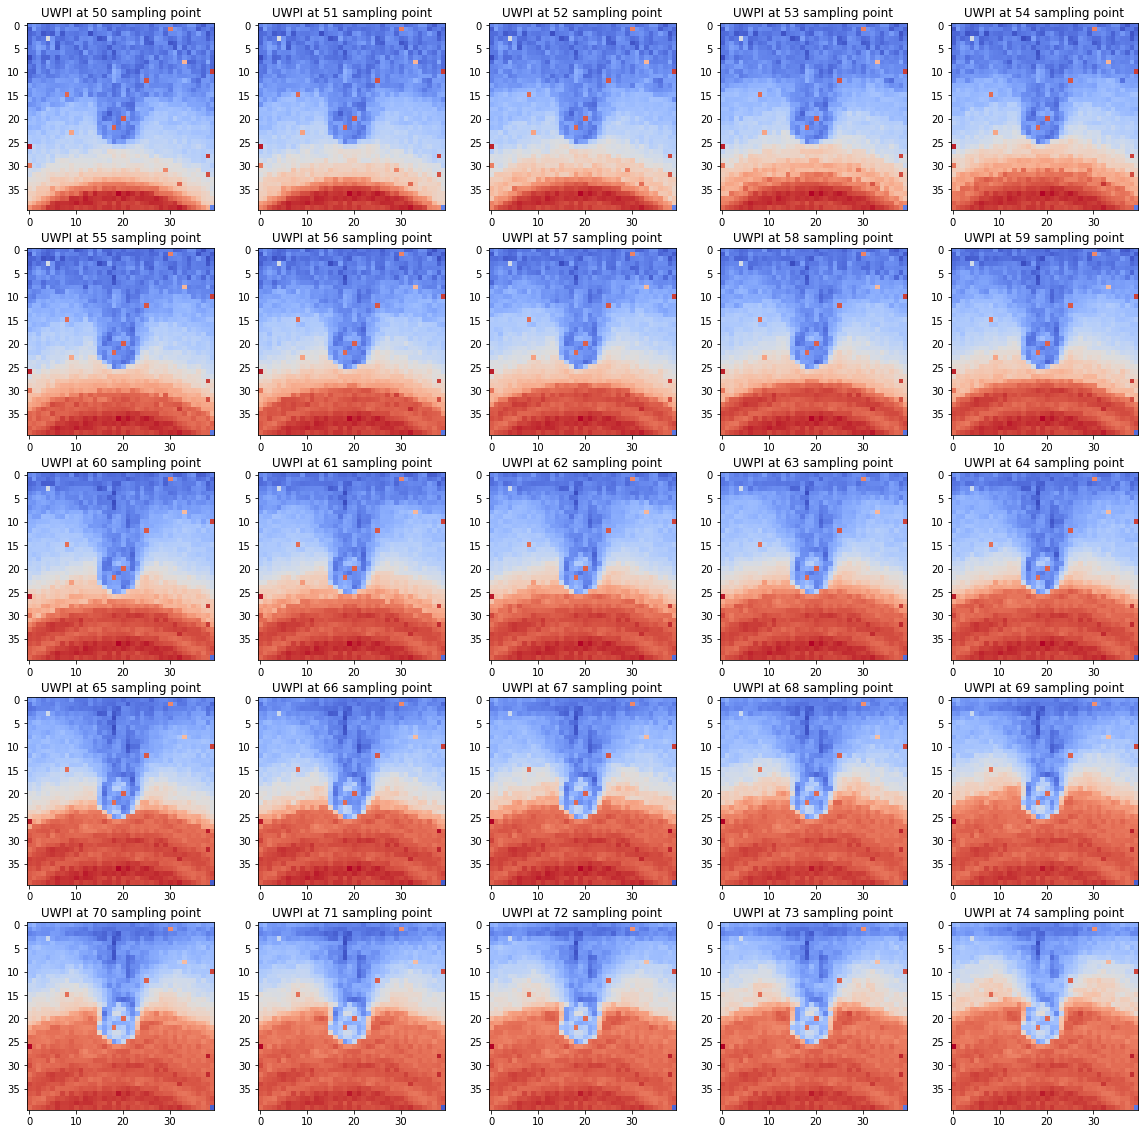

In [9]:
visualize_25_snapshot(frame = frame_rms, start_point = 50)